## Imports needed

In [82]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Read the data file

In [83]:
df = pd.read_csv("AirBnB-3.csv")

<IPython.core.display.Javascript object>

In [84]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


<IPython.core.display.Javascript object>

## Let's create a copy of the dataframe to avoid any loss to future modifications

In [85]:
data = df.copy()

<IPython.core.display.Javascript object>

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


<IPython.core.display.Javascript object>

## Data Preprocessing

In [87]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

## As shown above, there are no duplicate values 

In [88]:
# checking for missing values
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

## There are missing values in room_type, accommodates, bathrooms, cancellation_policy, cleaning fee and review_scores_rating
### Observations
#### review_scores_rating being null should be a clear indication of the property's worthiness to rent - let's not remove those null values 
#### All other null values can be imputed using the median 

In [89]:
# checking unique values in room_type
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

<IPython.core.display.Javascript object>

In [90]:
# checking unique values in cancellation_policy
df["cancellation_policy"].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

<IPython.core.display.Javascript object>

## Missing Value Treatment

In [91]:
# Remove missing 'room_type' rows
df = df[df["room_type"].notna()]

<IPython.core.display.Javascript object>

In [92]:
# Remove missing 'cancellation_policy' rows
df = df[df["cancellation_policy"].notna()]

<IPython.core.display.Javascript object>

### Impute values for bedrooms, bathrooms and beds by grouping the values of room_type and accommodates

In [93]:
df.groupby(["room_type", "accommodates"], as_index=False)["beds"].median()

,room_type,accommodates,beds
0,Entire home/apt,1.0,1.0
1,Entire home/apt,2.0,1.0
2,Entire home/apt,3.0,1.0
3,Entire home/apt,4.0,2.0
4,Entire home/apt,5.0,2.0
5,Entire home/apt,6.0,3.0
6,Entire home/apt,7.0,4.0
7,Entire home/apt,8.0,4.0
8,Entire home/apt,9.0,5.0
9,Entire home/apt,10.0,5.0


<IPython.core.display.Javascript object>

In [94]:
# imputing missing values in beds by taking the median
df["beds"] = df.groupby(["room_type", "accommodates"])["beds"].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [95]:
df.groupby(["room_type", "accommodates"], as_index=False)["bedrooms"].median()

,room_type,accommodates,bedrooms
0,Entire home/apt,1.0,1.0
1,Entire home/apt,2.0,1.0
2,Entire home/apt,3.0,1.0
3,Entire home/apt,4.0,1.0
4,Entire home/apt,5.0,2.0
5,Entire home/apt,6.0,2.0
6,Entire home/apt,7.0,3.0
7,Entire home/apt,8.0,3.0
8,Entire home/apt,9.0,3.0
9,Entire home/apt,10.0,4.0


<IPython.core.display.Javascript object>

In [96]:
# imputing missing values in bedrooms by taking the median
df["bedrooms"] = df.groupby(["room_type", "accommodates"])["bedrooms"].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [97]:
df.groupby(["room_type", "accommodates"], as_index=False)["bathrooms"].median()

,room_type,accommodates,bathrooms
0,Entire home/apt,1.0,1.00
1,Entire home/apt,2.0,1.00
2,Entire home/apt,3.0,1.00
3,Entire home/apt,4.0,1.00
4,Entire home/apt,5.0,1.00
5,Entire home/apt,6.0,1.50
6,Entire home/apt,7.0,2.00
7,Entire home/apt,8.0,2.00
8,Entire home/apt,9.0,2.00
9,Entire home/apt,10.0,2.00


<IPython.core.display.Javascript object>

In [98]:
# imputing missing values in bedrooms by taking the median
df["bathrooms"] = df.groupby(["room_type", "accommodates"])["bathrooms"].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [99]:
# checking for missing values
df.isnull().sum()

id                          0
room_type                   0
accommodates                0
bathrooms                   0
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    16718
bedrooms                    0
beds                        0
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [100]:
df["room_type"] = df["room_type"].replace(
    ["Entire home/apt", "Entire home/apt"], "Entire home"
)

<IPython.core.display.Javascript object>

## As shown above, we have imputed all null values except the review scores rating as we believe that properties not having a rating could show signs of low rentals

## Exploratory Data Analysis

In [101]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

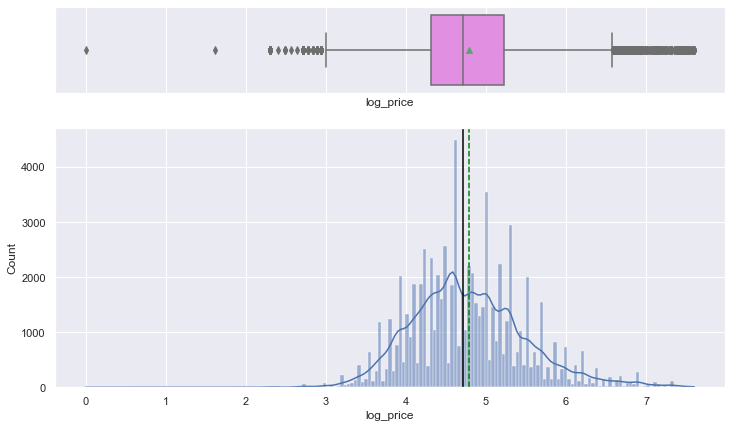

<IPython.core.display.Javascript object>

In [102]:
histogram_boxplot(df, "log_price", kde=True)

In [103]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

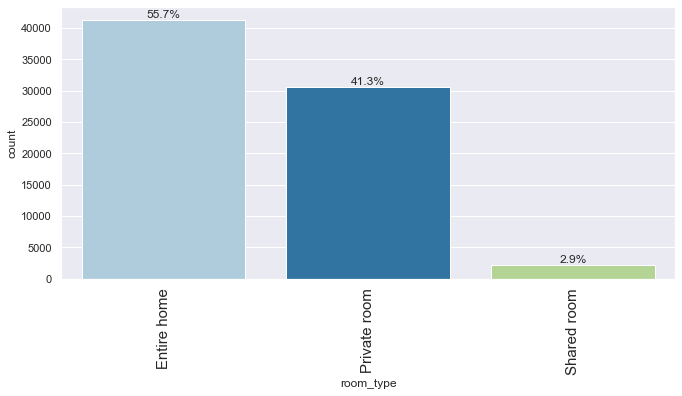

<IPython.core.display.Javascript object>

In [104]:
labeled_barplot(df, "room_type", perc=True, n=10)

## Above observation shows that "Entire Home" has rented more than the other two room types

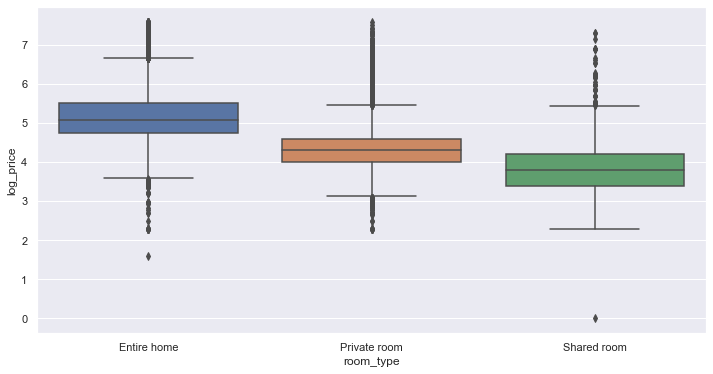

<IPython.core.display.Javascript object>

In [105]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="room_type", y="log_price", data=df)
plt.show()

## As shown above, the price is higher for Entire Home/apt compared to other room types. There is an outlier in the shared room 

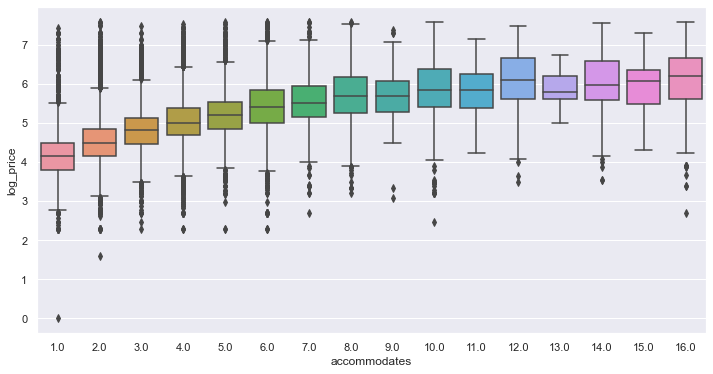

<IPython.core.display.Javascript object>

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="accommodates", y="log_price", data=df)
plt.show()

## As shown above, accommodates of more than 8 seem to have a higher price though for some numbers its less

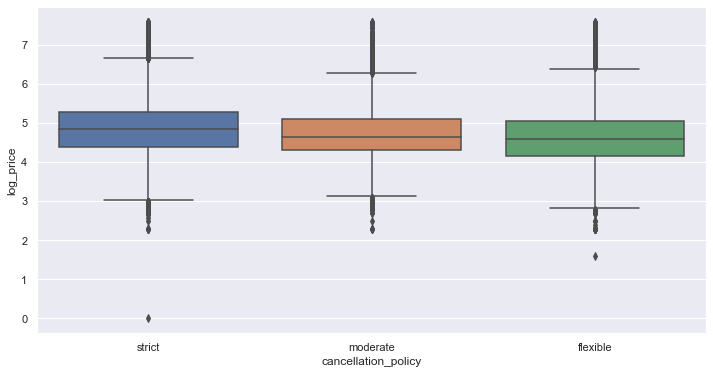

<IPython.core.display.Javascript object>

In [107]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="cancellation_policy", y="log_price", data=df)
plt.show()

## As shown above, the price seems to be higher for homes that have strict cancellation policies

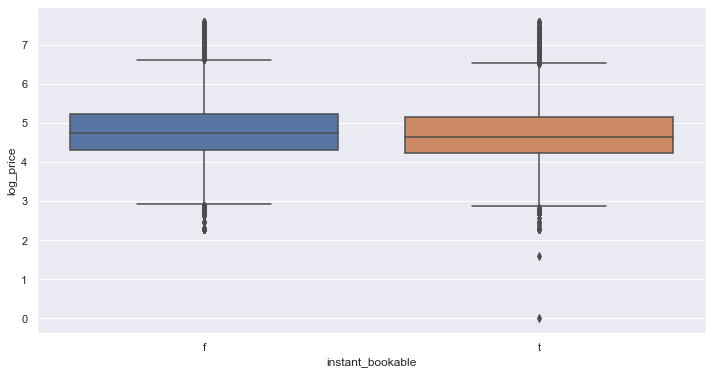

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="instant_bookable", y="log_price", data=df)
plt.show()

## As shown above, instant_bookable doesn't seem to be a major factor in deciding the price 

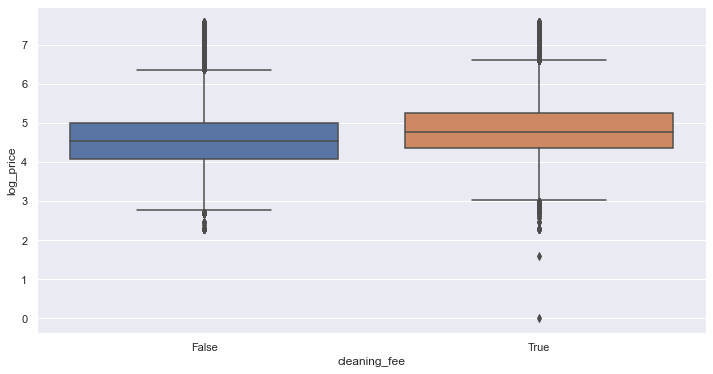

<IPython.core.display.Javascript object>

In [109]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="cleaning_fee", y="log_price", data=df)
plt.show()

## As shown above, new customers prefer homes that have a cleaning fee expecting their homes to be clean when they rent

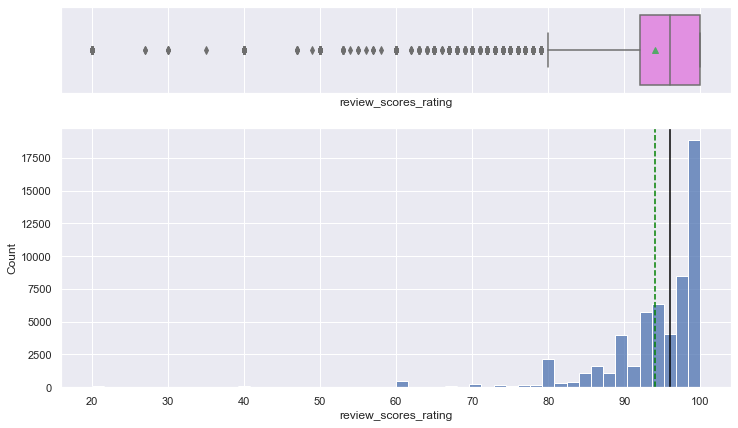

<IPython.core.display.Javascript object>

In [110]:
histogram_boxplot(df, "review_scores_rating", bins=50)

## As shown above, review_scores_rating is totally right skewed because of missing values of 16718 - believe we should impute this with the median ? 

In [111]:
# imputing missing values in review_scores_rating by taking the median
df["review_scores_rating"] = df.groupby(["room_type"])[
    "review_scores_rating"
].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [112]:
df.isnull().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

<IPython.core.display.Javascript object>

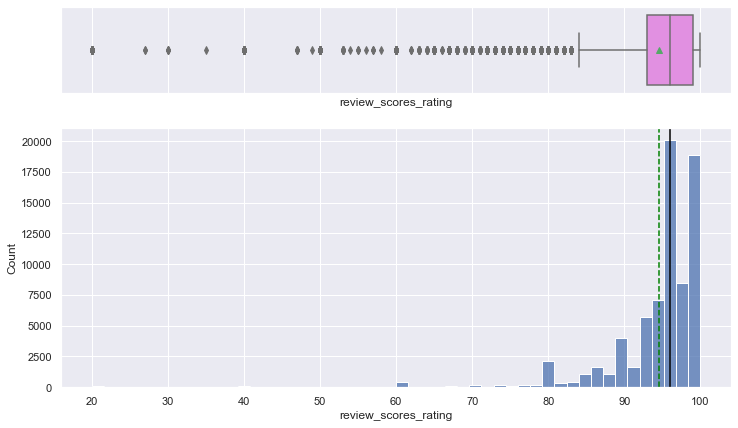

<IPython.core.display.Javascript object>

In [113]:
# replot the above histogram
histogram_boxplot(df, "review_scores_rating", bins=50)

## Do we need to perform log transformation on this column is a question ?

## Linear Model Building

In [114]:
# defining the dependent and independent variables
X = df.drop(["log_price"], axis=1)
y = df["log_price"]

<IPython.core.display.Javascript object>

In [115]:
X.select_dtypes(include=["object", "category"]).columns.tolist()

['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']

<IPython.core.display.Javascript object>

In [116]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=False,
)

X.head()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Entire home,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t
0,6901257,3.0,1.0,100.0,1.0,1.0,1,0,0,0,0,1,0,1,1,0
1,6304928,7.0,1.0,93.0,3.0,3.0,1,0,0,0,0,1,0,1,0,1
2,7919400,5.0,1.0,92.0,1.0,3.0,1,0,0,0,1,0,0,1,0,1
3,13418779,4.0,1.0,96.0,2.0,2.0,1,0,0,1,0,0,0,1,1,0
4,3808709,2.0,1.0,40.0,0.0,1.0,1,0,0,0,1,0,0,1,0,1


<IPython.core.display.Javascript object>

In [117]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [118]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 51868
Number of rows in test data = 22230


<IPython.core.display.Javascript object>

In [119]:
# fitting a linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [120]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
id,1.628931e-10
accommodates,8.131825e-02
bathrooms,1.460270e-01
review_scores_rating,6.898156e-03
bedrooms,1.563307e-01
beds,-5.747035e-02
room_type_Entire home,5.857202e-01
room_type_Private room,-5.518084e-02
room_type_Shared room,-5.305394e-01
cancellation_policy_flexible,2.016879e-02


<IPython.core.display.Javascript object>

### Model Performance Check

* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [121]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [122]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,133.325143,63.457434,0.36955,0.369355,39.749775


<IPython.core.display.Javascript object>

In [123]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model_perf_test = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,136.275113,64.015045,0.358609,0.358147,40.025434


<IPython.core.display.Javascript object>

In [124]:
!pip install mlxtend

<IPython.core.display.Javascript object>

In [125]:
## Let's use Forward Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    3.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    3.4s finished

[2021-10-12 23:04:07] Features: 1/16 -- score: 0.3647154865126424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2021-10-12 23:04:07] Features: 2/16 -- score: 0.4726761150466844[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.4s finished

[2021-10-12 23:04:07] Features: 3/16 -- score: 0.48700804210272697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  1

<IPython.core.display.Javascript object>

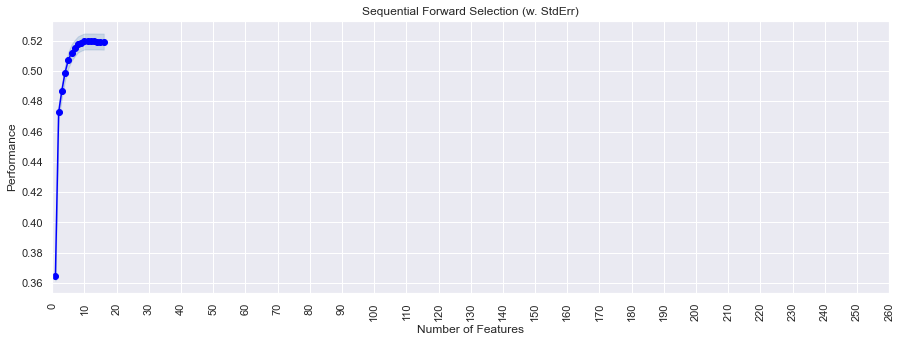

<IPython.core.display.Javascript object>

In [126]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(
    np.arange(0, 264, 10), np.arange(0, 264, 10), rotation=90
)  # to make the tick marks readable
plt.show()

## The model performance is constant around 12 features

In [127]:
reg = LinearRegression()

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features=10,
    forward=True,
    floating=False,
    scoring="r2",
    verbose=2,
    cv=5,
    n_jobs=-1,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.2s finished

[2021-10-12 23:04:23] Features: 1/10 -- score: 0.3647154865126424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished

[2021-10-12 23:04:23] Features: 2/10 -- score: 0.4726761150466844[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.4s finished

[2021-10-12 23:04:24] Features: 3/10 -- score: 0.48700804210272697[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  1

<IPython.core.display.Javascript object>

In [128]:
# important features
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 4, 5, 6, 8, 10, 12, 14]


<IPython.core.display.Javascript object>

In [129]:
x_train.columns[feat_cols]

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'room_type_Entire home', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cleaning_fee_False',
       'instant_bookable_f'],
      dtype='object')

<IPython.core.display.Javascript object>

## Now we will fit skeleton model using these features

In [130]:
x_train2 = x_train[x_train.columns[feat_cols]]

<IPython.core.display.Javascript object>

In [131]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test2 = x_test[x_train2.columns]

<IPython.core.display.Javascript object>

In [132]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_, lin_reg_model2.intercept_.flatten()),
    index=x_train2.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
accommodates,0.081179
bathrooms,0.146062
review_scores_rating,0.006917
bedrooms,0.156451
beds,-0.057609
room_type_Entire home,0.640548
room_type_Shared room,-0.475257
cancellation_policy_moderate,-0.049064
cleaning_fee_False,0.077370
instant_bookable_f,0.054675


<IPython.core.display.Javascript object>

In [133]:
# model performance on train set
print("Training Performance:")
lin_reg_model2_perf_train = model_performance_regression(
    lin_reg_model2, x_train2, y_train
)
lin_reg_model2_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,133.331364,63.447021,0.369491,0.36937,39.741148


<IPython.core.display.Javascript object>

In [134]:
# model performance on test set
print("Test Performance:")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test)
lin_reg_model2_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,136.277953,64.001369,0.358582,0.358293,40.016289


<IPython.core.display.Javascript object>

In [135]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_perf_train.T, lin_reg_model2_perf_train.T,], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,133.325143,133.331364
MAE,63.457434,63.447021
R-squared,0.369550,0.369491
Adj. R-squared,0.369355,0.369370
MAPE,39.749775,39.741148


<IPython.core.display.Javascript object>

## Observations

1. With our linear regression model *lin_reg_model2*, we have been able to capture ~36% of the variation in the data.

2. MAE indicates that our current model is able to predict rental prices within a mean error of approx. 63k on the test data, and the MAPE indicates that the model can predict within ~39% of the rental price.
